<a href="https://colab.research.google.com/github/hpink97/tensorflow_keras_practice/blob/main/IMBD_review_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of IMBD movie reviews using Dense neural networks** 
- 50,000 (25k test & 25k train) text reviews for movies
- labelled as positive (1) or negative (0)
- Use a Dense-layer neural network to classify
---



In [1]:
## Load libraries
import numpy as np
import matplotlib.pyplot as plt
import gc #garbage collection needed to save RAM



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [2]:
## total dataset include over 80,000 words
## many only appear once and are uninformative for the model
## use top 8,000 most frequent words for model here
n_words = 8000
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=n_words)

### data encodes a list of word indicies, showing the sequence of specific words in the review

In [3]:
train_data.shape


(25000,)

In [4]:
train_data[69][:20]

[1,
 48,
 335,
 6,
 337,
 7,
 22,
 1359,
 5,
 104,
 36,
 92,
 97,
 4403,
 40,
 36,
 343,
 8,
 133,
 9]

### convert index sequence back to words to read review 
- review 69 shown here
- label data shows that the review is labelled as positive


In [5]:
word2index = imdb.get_word_index()
index2word = dict(
    [(value, key) for (key, value) in word2index.items()]
)

##indices 1-3 are used for padding start of sequence and unknown words 
## words not in most frequent 5000 that we pulled data for
review_69 = " ".join([index2word.get(i -3, '?') for i in train_data[69]])
print(review_69)
print(train_labels[69])

? if you're a fan of film noir and think they don't make 'em like they used to here is your answer they just don't make 'em in hollywood anymore we must turn to the french to remember how satisfying subtle and terrific a well made film from that genre can be read my lips is a wonderfully nasty little gift to the faithful from director jacques ? featuring sharp storytelling and fine performances from ? ? and vincent ? br br the basic plot could have been written in the 40's dumb but appealing ex con and a smart but ? femme fatale who turns out to be ? ambitious discover each other while living lives of bleak desperation and longing ? each other to meet their own ends develop complex love hate relationship cook up criminal scheme involving heist double crosses close calls and lots of money all action takes place in depressing seedy and or poorly lit locations br br ? has fashioned some modern twists of course the femme fatale is an ? office worker who happens to be nearly deaf and uses h

### Use multi-hot enoding to standaradise imput format
- lengths of reviews are all different
- our neural network will require the input tensor to be of the same size
- we generate vectorised sequences which are binary (1's where the word exists)
- this does however lose ordering (we're just saying whether a word exists in the review

In [6]:
def multi_hot_enoding(sequences):
  x = np.zeros((len(sequences), n_words))
  for i, seq in enumerate(sequences):
    for j in seq:
      x[i,j] = 1
  return x


x_train = multi_hot_enoding(train_data)
x_test = multi_hot_enoding(test_data)

#train_data object no longer needed - delete to save RAM
del train_data
gc.collect()
x_train[69]


array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
### convert labels to vectors also 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the neural network 

In [8]:
#build neural net classifier
# use simple dense layers

layer_size = 16

review_clf = keras.Sequential([
    layers.Dense(layer_size, activation='relu'),
    #layers.Dense(layer_size-2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])



review_clf.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)





In [9]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.35, random_state=7)

print(f"{partial_x_train.shape[0]} training samples, {x_val.shape[0]} validation samples and {y_test.shape[0]} test samples")

16250 training samples, 8750 validation samples and 25000 test samples


# **Train the model**
- 50 training cycles of back-propogation and weights updates
- Training performed in batches of 500 samples

In [10]:

train_history_full = review_clf.fit(partial_x_train, partial_y_train, 
                                    epochs =50, batch_size = 500, 
                                    validation_data =(x_val, y_val))
gc.collect() # collect garbage


Epoch 1/50
33/33 [==============================] - 3s 46ms/step - loss: 0.5189 - accuracy: 0.7829 - val_loss: 0.3817 - val_accuracy: 0.8632
Epoch 2/50
33/33 [==============================] - 1s 25ms/step - loss: 0.3076 - accuracy: 0.8997 - val_loss: 0.3096 - val_accuracy: 0.8834
Epoch 3/50
33/33 [==============================] - 1s 22ms/step - loss: 0.2389 - accuracy: 0.9222 - val_loss: 0.2869 - val_accuracy: 0.8873
Epoch 4/50
33/33 [==============================] - 1s 21ms/step - loss: 0.2005 - accuracy: 0.9370 - val_loss: 0.2789 - val_accuracy: 0.8875
Epoch 5/50
33/33 [==============================] - 1s 22ms/step - loss: 0.1730 - accuracy: 0.9481 - val_loss: 0.2790 - val_accuracy: 0.8883
Epoch 6/50
33/33 [==============================] - 1s 23ms/step - loss: 0.1529 - accuracy: 0.9564 - val_loss: 0.2790 - val_accuracy: 0.8879
Epoch 7/50
33/33 [==============================] - 1s 21ms/step - loss: 0.1354 - accuracy: 0.9623 - val_loss: 0.2850 - val_accuracy: 0.8843
Epoch 8/50
33

1402

## Plot accuracy/loss results throughout training cycles
- After more than 5 cycles, the model begins to **overfit**
- After ~30 cycles, the model has perfectly memorised the training data, but has lost performance on unseen data


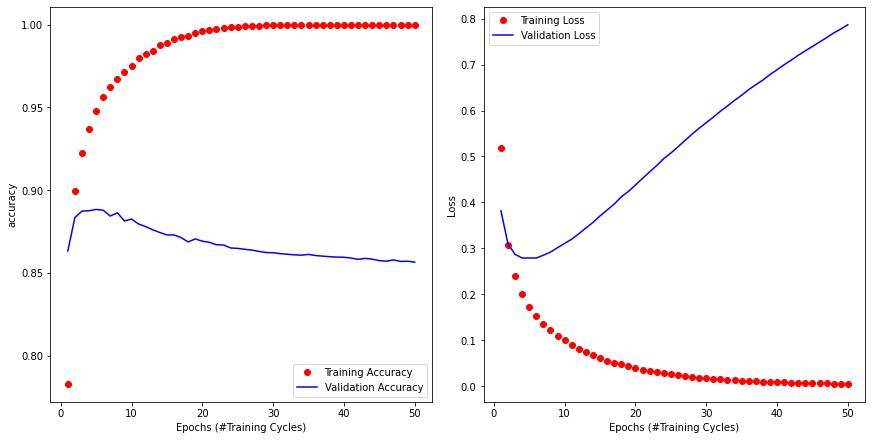

In [11]:
##plot 
plt.rcParams['figure.figsize'] = [12, 6]
train_stats = train_history_full.history
train_acc = train_stats['accuracy']
val_acc = train_stats['val_accuracy']
train_loss = train_stats['loss']
val_loss = train_stats['val_loss']
epochs = range(1, len(val_acc)+1)


axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=False))

axs[0].plot(epochs, train_acc, 'ro',
         label='Training Accuracy',)
axs[0].plot(epochs, val_acc, 'b',
         label = 'Validation Accuracy')
axs[0].set_xlabel('Epochs (#Training Cycles)')
axs[0].set_ylabel('accuracy')
axs[0].legend()


axs[1].plot(epochs, train_loss, 'ro',
         label='Training Loss',)
axs[1].plot(epochs, val_loss, 'b',
         label = 'Validation Loss')
axs[1].set_xlabel('Epochs (#Training Cycles)')
axs[1].set_ylabel('Loss')
axs[1].legend()
plt.show()


## Re-train model with identical paramaters, but fewer training cycles (to avoid overfitting)

In [12]:
review_clf2 = keras.Sequential([
    layers.Dense(layer_size, activation='relu'),
    #layers.Dense(layer_size-2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

review_clf2.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)

#find epoch which achieved best validation accuracy in previous model

best_acc = [i for i, x in enumerate(val_acc == np.max(val_acc)) if x] 
best_epoch = best_acc[0]+1

review_clf2.fit(partial_x_train, partial_y_train,
                epochs =best_epoch, batch_size = 500, 
                validation_data =(x_val, y_val))
gc.collect()

Epoch 1/5
33/33 [==============================] - 1s 29ms/step - loss: 0.5620 - accuracy: 0.7748 - val_loss: 0.4324 - val_accuracy: 0.8543
Epoch 2/5
33/33 [==============================] - 0s 15ms/step - loss: 0.3531 - accuracy: 0.8886 - val_loss: 0.3352 - val_accuracy: 0.8768
Epoch 3/5
33/33 [==============================] - 1s 15ms/step - loss: 0.2678 - accuracy: 0.9149 - val_loss: 0.3004 - val_accuracy: 0.8853
Epoch 4/5
33/33 [==============================] - 0s 15ms/step - loss: 0.2217 - accuracy: 0.9294 - val_loss: 0.2837 - val_accuracy: 0.8888
Epoch 5/5
33/33 [==============================] - 0s 15ms/step - loss: 0.1905 - accuracy: 0.9394 - val_loss: 0.2771 - val_accuracy: 0.8891


1440

# Assess model accuracy on **test data**
- we achieve 88.3% accuracy (not too bad) 
- we can see that the model which undergoes many training cycles (epochs) has become overfit (only 84% accuracy)

In [13]:
gc.collect()
model_results = review_clf.evaluate(x_test, y_test)
loss = model_results[0]
accuracy = model_results[1]*100
print(f"Neural Network IMDB review classifier trained on {n_words} unique words with 30 epochs. Achieving {accuracy:.1f}% accuracy and a loss of {loss:.2f}")

gc.collect()
model_results = review_clf2.evaluate(x_test, y_test)
loss2 = model_results[0]
accuracy2 = model_results[1]*100
print(f"Neural Network IMDB review classifier trained on {n_words} unique words with 5 epochs. Achieving {accuracy2:.1f}% accuracy and a loss of {loss2:.2f}")



782/782 [==============================] - 2s 3ms/step - loss: 0.8347 - accuracy: 0.8465
Neural Network IMDB review classifier trained on 8000 unique words with 30 epochs. Achieving 84.6% accuracy and a loss of 0.83
782/782 [==============================] - 2s 3ms/step - loss: 0.2925 - accuracy: 0.8833
Neural Network IMDB review classifier trained on 8000 unique words with 5 epochs. Achieving 88.3% accuracy and a loss of 0.29


### assess the models prediction confidence

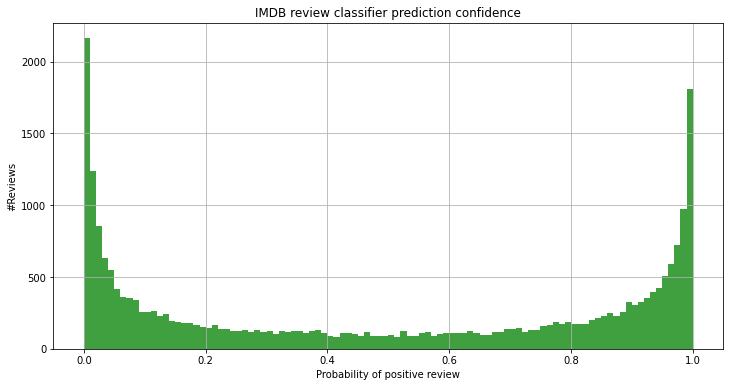

In [14]:
gc.collect()
y_pred = review_clf2.predict(x_test)


n, bins, patches = plt.hist(y_pred, 100, density=False, facecolor='g', alpha=0.75)


plt.xlabel('Probability of positive review')
plt.ylabel('#Reviews')
plt.title('IMDB review classifier prediction confidence')
plt.grid(True)
plt.show()

## Find the reviews that the model predicts to be the most negative and the most positive

In [15]:

test = y_pred == np.min(y_pred)
ind = [i for i, x in enumerate(test) if x]
most_negative_review = test_data[ind[0]]
" ".join([index2word.get(i -3, '?') for i in most_negative_review])

"? ? or creatures from the ? as i'm positive it's more ? known as filmed under as the title creatures from the ? appears over a moving image in the same ? type as the rest of the credits starts with five 20 something kids mike clay rogers his girlfriend margaret sharon sisters julie ann wolf dorothy ? an annoying idiot named bobby michael ? whom decide to all fit into a small rubber boat head out to sea don't ask why as i don't know oh the complete idiot bobby left the ? behind never thought to tell anyone so it comes as no great surprise that they end up stranded out at sea without any ? for the ? to make matters worse they become trapped in a thunder storm discover a dead body floating in the water shortly after their luck seems to change when they come across a ? potential safety in a flash everyone ? the ? begin to explore first of all they find a scientific lab with various fish ? computer equipment then down below they find fully ? ? ? they find a ? ? ? who appears mad can't talk

In [16]:


test = y_pred == np.max(y_pred)
ind = [i for i, x in enumerate(test) if x]
most_positive_review = test_data[ind[0]]
" ".join([index2word.get(i -3, '?') for i in most_positive_review])

"? life is ? of ? possibilities some known others a mystery and destined to remain so and what of the vast unknown the ? beyond which knowledge has no established boundaries or ? who is to say what exists or what is possible valid questions all of which are raised and explored in the story of a particular ? personal journey a strange and dramatic odyssey that defies facts and logic in k ? ' directed by and starring kevin spacey and jeff bridges in the wake of an incident in new ? central station a man named spacey is ? to a ? hospital in manhattan where he is delivered into the care of dr mark powell bridges who attempts to ? the truth about his patient who claims to be from the distant planet k ? it quickly becomes a challenge for dr powell as with his calm direct ? manner and a ? for produce he eats ? ? and all and red delicious ? are his favorites is quite convincing but it's ? job as well as his nature to be skeptical claims however remain intact and stand up even under the most in